Fujie Wang 

Problem Set 6

In [ ]:
#Problem 1

In [ ]:
#a

In [2]:
import pandas as pd
data=pd.read_csv("/Users/fujie/Desktop/Auto.csv", na_values='?')

In [ ]:
#b

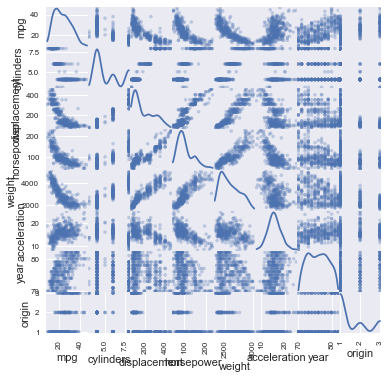

In [6]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
plt.style.use('seaborn')
data.dropna(inplace=True)
df_quant=data[['mpg','cylinders','displacement','horsepower',
             'weight','acceleration','year','origin']]
df_quant=df_quant.astype(float)
scatter_matrix(df_quant, alpha=0.3,figsize=(6,6),diagonal='kde')
plt.show()

In [ ]:
#c

In [5]:
df_quant.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [ ]:
#d

In [7]:
import statsmodels.api as sm
y = df_quant['mpg']
x = sm.add_constant(df_quant[['cylinders','displacement','horsepower','weight',
                              'acceleration','year','origin']])
reg1 = sm.OLS(y, x)
results = reg1.fit()
print(results.summary())

/Users/fujie/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 19 Feb 2019   Prob (F-statistic):          2.04e-139
Time:                        22:48:56   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

In [ ]:
# i: displacements, weight, year, and origin 
# ii: Cylinders, horsepower, acceleration
# iii: one unit uncrease in year is associated with 0.75 unit increase in mpg everything else being equal

In [ ]:
#e

In [ ]:
# cylinders, acceleration, and origin look most likely to have a nonlinear relationship with mpgi

In [8]:
import numpy as np
df_quant['cylinders_sqr']=np.square(df_quant['cylinders'])
df_quant['displacement_sqr']=np.square(df_quant['displacement'])
df_quant['origin_sqr']=np.square(df_quant['origin'])
df_quant['acceleration_sqr']=np.square(df_quant['acceleration'])
x2 = sm.add_constant(df_quant[['cylinders','displacement','horsepower','weight',
                              'acceleration','year','origin',
                               'cylinders_sqr','displacement_sqr','origin_sqr','acceleration_sqr']])
reg2 = sm.OLS(y, x2)
results2 = reg2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     207.9
Date:                Tue, 19 Feb 2019   Prob (F-statistic):          2.99e-153
Time:                        23:03:44   Log-Likelihood:                -979.27
No. Observations:                 392   AIC:                             1983.
Df Residuals:                     380   BIC:                             2030.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2019      7.474  

i: Adjusted $R^2$ is 0.853 which is larger than 0.818 in part (d). This means the model in part(e) better fits the data.

ii: The coefficients on displacement and squared displacement are both statistically significant at the 1% level.

iii: The coefficients on cylinders and squared cylinders are not statistically significant at the 10% level.

In [9]:
# f

In [11]:
results2.predict([1, 6, 200, 100, 3100, 15.1, 99, 1, 6**2, 200**2, 1, 15.1**2])

array([38.67266199])

The predicted value is 38.67

In [15]:
# 2

In [ ]:
#a

In [18]:
X1 = [0, 2, 0, 0, -1, 1]
X2 = [3, 0, 1, 1, 0, 1]
X3 = [0, 0, 3, 2, 1, 1]
Y = ['Red', 'Red', 'Red', 'Green', 'Green', 'Red']
knn = pd.DataFrame(data={'X1':X1, 'X2':X2, 'X3':X3, 'Y':Y})
knn['distance'] = round(np.sqrt(knn.X1**2 + knn.X2**2 + knn.X3**2),2)
knn

,X1,X2,X3,Y,distance
0,0,3,0,Red,3.00
1,2,0,0,Red,2.00
2,0,1,3,Red,3.16
3,0,1,2,Green,2.24
4,-1,0,1,Green,1.41
5,1,1,1,Red,1.73


In [ ]:
#b

For K = 1, the nearest one is the 5th observation with a distance 1.41. And the 5th observation is Green. So our prediction is green.

In [ ]:
#c

For K = 3, the nearest 3 observations are the 2nd, 5th and 6th observation.Two of them are red and one of them is green. So our prediction is red.

In [ ]:
#d

If the Bayes (optimal) decision boundary in this problem is highly non-linear, this classifier is likely overfitting the data so we expect N to be small.

In [ ]:
#e

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn_p = KNeighborsClassifier(n_neighbors = 2)
predictors = list(zip(knn['X1'], knn['X2'], knn['X3']))
knn_p.fit(predictors, knn['Y'])
prediction = knn_p.predict([[1, 1, 1]])[0]
print("The KNN classifier prediction:", prediction)

The KNN classifier prediction: Green


In [ ]:
#3

In [25]:
df_quant['mpg high'] = np.where(df_quant['mpg']>np.median(df_quant['mpg']),1,0)

In [31]:
log_x = sm.add_constant(df_quant[['cylinders','displacement','horsepower','weight',
                              'acceleration','year','origin']])
log_y = df_quant['mpg high']
log_reg1 = sm.Logit(log_y, log_x, missing = 'drop')
log_results1 = log_reg1.fit()

Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9


In [32]:
print(log_results1.summary2())

                        Results: Logit
Model:              Logit            No. Iterations:   9.0000  
Dependent Variable: mpg high         Pseudo R-squared: 0.710   
Date:               2019-02-20 00:52 AIC:              173.5398
No. Observations:   392              BIC:              205.3099
Df Model:           7                Log-Likelihood:   -78.770 
Df Residuals:       384              LL-Null:          -271.71 
Converged:          1.0000           Scale:            1.0000  
---------------------------------------------------------------
               Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
---------------------------------------------------------------
const         -17.1549   5.7638 -2.9763 0.0029 -28.4517 -5.8580
cylinders      -0.1626   0.4232 -0.3842 0.7008  -0.9920  0.6669
displacement    0.0021   0.0120  0.1741 0.8618  -0.0215  0.0257
horsepower     -0.0410   0.0239 -1.7183 0.0857  -0.0878  0.0058
weight         -0.0043   0.0011 -3.7844 0.0002  -0.0066 -0.0021
a

The regressors that have coeﬃcients that are statistically signiﬁcant at the 5% level:
weight and year 

In [ ]:
#b

In [33]:
import sklearn
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(log_x, log_y,
                                                    test_size = 0.5, random_state=10)

In [64]:
#c

In [65]:
from sklearn.linear_model import LogisticRegression
log2_results2 = LogisticRegression().fit(X_train, y_train)
coefficients = log2_results2.coef_
names = log_x.columns.tolist()
coefficients_list = coefficients.tolist()[0]
df_logit = pd.DataFrame(data={'Regressors':names, 'coefficients':coefficients_list})
df_logit

,Regressors,coefficients
0,const,-0.154038
1,cylinders,-1.090639
2,displacement,0.012935
3,horsepower,-0.036443
4,weight,-0.005076
5,acceleration,-0.197466
6,year,0.325756
7,origin,-0.133918


In [58]:
#d

In [69]:
y_pred = log2_results2.predict(X_test)

In [70]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[86, 13],
       [11, 86]])

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.89      0.87      0.88        99
          1       0.87      0.89      0.88        97

avg / total       0.88      0.88      0.88       196



F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. We have same f1-score for 0 and 1. So this model predicts equally well on low mpg and high mpg.